#### About

> Customer clustering for market segmentation.

Dataset - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv('/home/suraj/kaggle_datasets/Mall_Customers.csv')
df_eda = df

#### 1. Data preprocessing.

In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Drop unnecessary columns
df.drop(['CustomerID'], axis=1, inplace=True)

In [5]:
# Check for missing values
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:

# Perform label encoding for categorical column 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
# Perform feature scaling for 'Annual Income (k$)' and 'Spending Score (1-100)'
scaler = MinMaxScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])


In [8]:

# Check the statistical summary of the dataset
print(df.describe())

           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000            0.373443                0.502041
std      0.497633   13.969007            0.215285                0.263505
min      0.000000   18.000000            0.000000                0.000000
25%      0.000000   28.750000            0.217213                0.344388
50%      1.000000   36.000000            0.381148                0.500000
75%      1.000000   49.000000            0.516393                0.734694
max      1.000000   70.000000            1.000000                1.000000


In [9]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,0.000000,0.387755
1,0,21,0.000000,0.816327
2,1,20,0.008197,0.051020
3,1,23,0.008197,0.775510
4,1,31,0.016393,0.397959
...,...,...,...,...
195,1,35,0.860656,0.795918
196,1,45,0.909836,0.275510
197,0,32,0.909836,0.744898
198,0,32,1.000000,0.173469


#### 2. EDA.

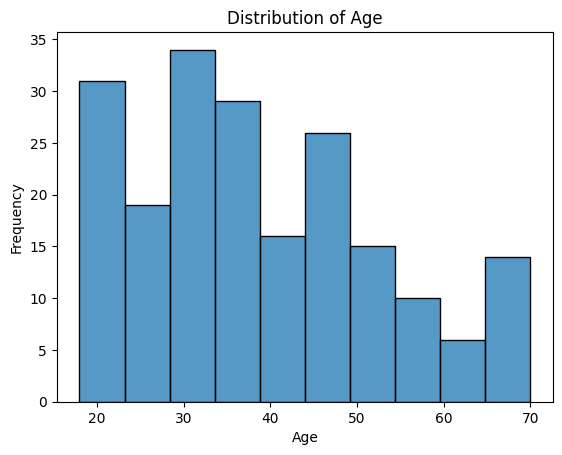

In [10]:
# Visualize the distribution of 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
sns.histplot(df_eda['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


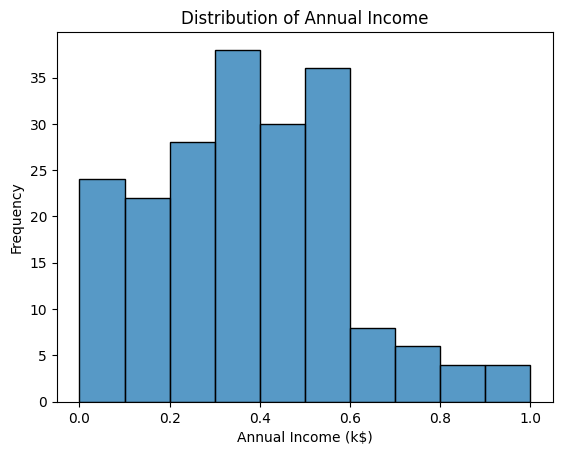

In [11]:
sns.histplot(df_eda['Annual Income (k$)'], bins=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()


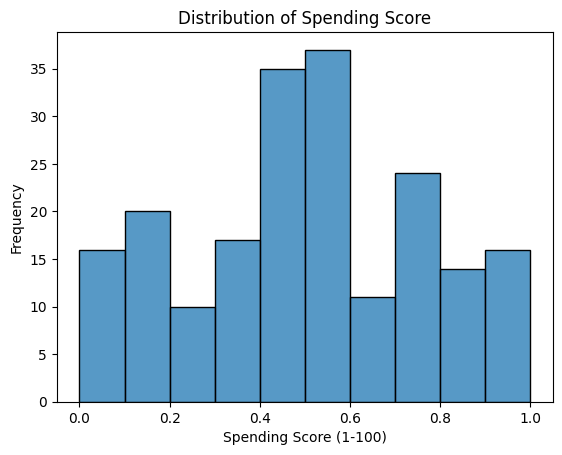

In [12]:
sns.histplot(df_eda['Spending Score (1-100)'], bins=10)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()

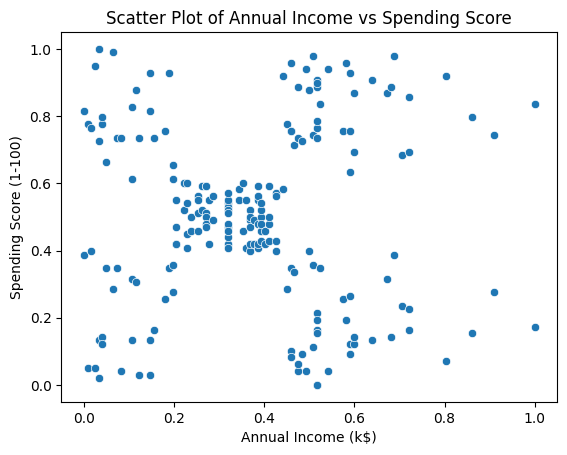

In [13]:
# Visualize the relationships between different features using scatter plots
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_eda)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

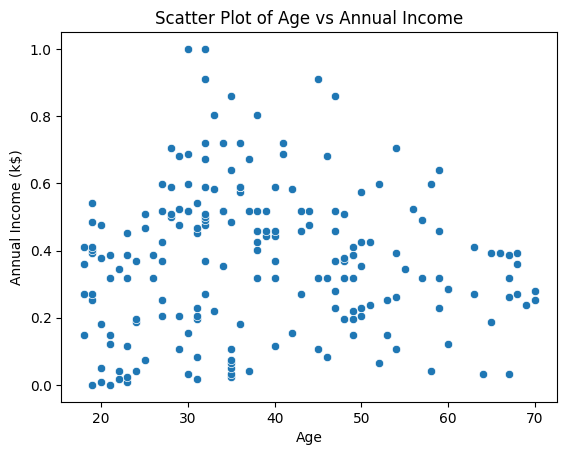

In [14]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df_eda)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Age vs Annual Income')
plt.show()


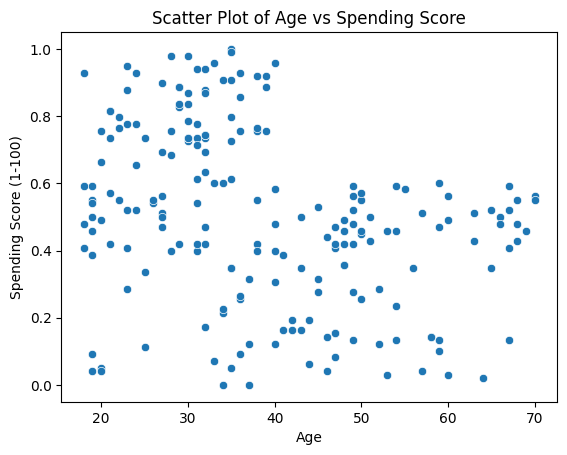

In [15]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_eda)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs Spending Score')
plt.show()

#### 3. Feature Engineering

In [16]:
# Perform dimensionality reduction using PCA 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(['Gender'], axis=1)) 


In [17]:
# Create new columns for the PCA components
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

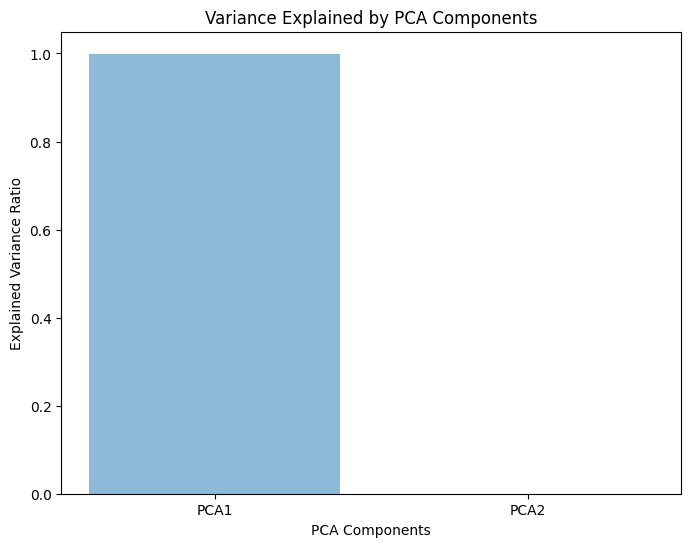

In [18]:
#visualize the variance 
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5)
plt.xticks(ticks=[1, 2], labels=['PCA1', 'PCA2'])
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by PCA Components')
plt.show()


In [19]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
0,0,19,0.000000,0.387755,-19.848844,0.244777
1,0,21,0.000000,0.816327,-17.851529,-0.196044
2,1,20,0.008197,0.051020,-18.846786,0.575079
3,1,23,0.008197,0.775510,-15.851316,-0.167766
4,1,31,0.016393,0.397959,-7.849139,0.160103
...,...,...,...,...,...,...
195,1,35,0.860656,0.795918,-3.851834,-0.280334
196,1,45,0.909836,0.275510,6.151179,0.177135
197,0,32,0.909836,0.744898,-6.851471,-0.211835
198,0,32,1.000000,0.173469,-6.847960,0.357547


In [20]:
#creating new features
df['Income_Score_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']
df['Age_Income_Ratio'] = df['Age'] / df['Annual Income (k$)']
df['Age_Spending_Ratio'] = df['Age'] / df['Spending Score (1-100)']


In [21]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Income_Score_Ratio,Age_Income_Ratio,Age_Spending_Ratio
0,0,19,0.000000,0.387755,-19.848844,0.244777,0.000000,inf,49.000000
1,0,21,0.000000,0.816327,-17.851529,-0.196044,0.000000,inf,25.725000
2,1,20,0.008197,0.051020,-18.846786,0.575079,0.160656,2440.000000,392.000000
3,1,23,0.008197,0.775510,-15.851316,-0.167766,0.010569,2806.000000,29.657895
4,1,31,0.016393,0.397959,-7.849139,0.160103,0.041194,1891.000000,77.897436
...,...,...,...,...,...,...,...,...,...
195,1,35,0.860656,0.795918,-3.851834,-0.280334,1.081337,40.666667,43.974359
196,1,45,0.909836,0.275510,6.151179,0.177135,3.302368,49.459459,163.333333
197,0,32,0.909836,0.744898,-6.851471,-0.211835,1.221424,35.171171,42.958904
198,0,32,1.000000,0.173469,-6.847960,0.357547,5.764706,32.000000,184.470588


In [22]:
#checking for null or NAN values

# Check for NaN values along the rows (axis=0)
if df.isnull().any(axis=0).any():
    print("DataFrame contains NaN values along the rows.")
else:
    print("DataFrame does not contain NaN values along the rows.")

# Check for NaN values along the columns (axis=1)
if df.isnull().any(axis=1).any():
    print("DataFrame contains NaN values along the columns.")
else:
    print("DataFrame does not contain NaN values along the columns.")

DataFrame does not contain NaN values along the rows.
DataFrame does not contain NaN values along the columns.


In [23]:
#check for infinity values
print(np.isinf(df).sum()) 


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
PCA1                      0
PCA2                      0
Income_Score_Ratio        2
Age_Income_Ratio          2
Age_Spending_Ratio        2
dtype: int64


In [24]:
# Replace infinite values with NaN
df[np.isinf(df)] = np.nan


In [25]:
# Drop samples with any missing values (NaN) from the feature-scaled dataframe
df.dropna(inplace=True)

In [26]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'PCA1',
       'PCA2', 'Income_Score_Ratio', 'Age_Income_Ratio', 'Age_Spending_Ratio'],
      dtype='object')

In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Income_Score_Ratio,Age_Income_Ratio,Age_Spending_Ratio
2,1,20,0.008197,0.051020,-18.846786,0.575079,0.160656,2440.000000,392.000000
3,1,23,0.008197,0.775510,-15.851316,-0.167766,0.010569,2806.000000,29.657895
4,1,31,0.016393,0.397959,-7.849139,0.160103,0.041194,1891.000000,77.897436
5,1,22,0.016393,0.765306,-16.851236,-0.151560,0.021421,1342.000000,28.746667
6,1,35,0.024590,0.051020,-3.847075,0.482075,0.481967,1423.333333,686.000000
...,...,...,...,...,...,...,...,...,...
195,1,35,0.860656,0.795918,-3.851834,-0.280334,1.081337,40.666667,43.974359
196,1,45,0.909836,0.275510,6.151179,0.177135,3.302368,49.459459,163.333333
197,0,32,0.909836,0.744898,-6.851471,-0.211835,1.221424,35.171171,42.958904
198,0,32,1.000000,0.173469,-6.847960,0.357547,5.764706,32.000000,184.470588


#### 4. Model Selection


In [28]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
#df['KMeans_Labels'] = kmeans.labels_
kmeans_silhouette_score = silhouette_score(df, kmeans.labels_)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(df)
#df['AggCluster_Labels'] = agg_clustering.labels_
agg_clustering_silhouette_score = silhouette_score(df, agg_clustering.labels_)


In [30]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df)
#df['DBSCAN_Labels'] = dbscan.labels_

DBSCAN(eps=0.3)

In [31]:
# Remove 'GMM_Labels' column if it exists
#if 'GMM_Labels' in df.columns:
#    df.drop('GMM_Labels', axis=1, inplace=True)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df)

# Add 'GMM_Labels' column to the dataframe with predicted labels
#GMM_Labels = gmm.predict(df)

# Calculate silhouette score
gmm_silhouette_score = silhouette_score(df, gmm.predict(df))


In [32]:
# Print the silhouette scores for each model
print("KMeans Silhouette Score: ", kmeans_silhouette_score)
print("Agglomerative Clustering Silhouette Score: ", agg_clustering_silhouette_score)
print("Gaussian Mixture Model Silhouette Score: ", gmm_silhouette_score)


KMeans Silhouette Score:  0.7742808911184813
Agglomerative Clustering Silhouette Score:  0.7836803933488434
Gaussian Mixture Model Silhouette Score:  0.7658290761615788


#### 5. Model tuning


In [33]:
# Define hyperparameter values for tuning
kmeans_params = {'n_clusters': range(2, 11)}
agglomerative_params = {'n_clusters': range(2, 11)}
dbscan_params = {'eps': [0.1, 0.2, 0.3, 0.4, 0.5],
                 'min_samples': [2, 3, 4, 5, 6]}
gmm_params = {'n_components': range(2, 11)}


In [34]:
# Perform model tuning for KMeans
kmeans_best_silhouette_score = -1
kmeans_best_model = None
for n_clusters in kmeans_params['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_score_kmeans = silhouette_score(df, labels)
    if silhouette_score_kmeans > kmeans_best_silhouette_score:
        kmeans_best_silhouette_score = silhouette_score_kmeans
        kmeans_best_model = kmeans


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [35]:
# Perform model tuning for Agglomerative Clustering
agglomerative_best_silhouette_score = -1
agglomerative_best_model = None
for n_clusters in agglomerative_params['n_clusters']:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(df)
    silhouette_score_agglomerative = silhouette_score(df, labels)
    if silhouette_score_agglomerative > agglomerative_best_silhouette_score:
        agglomerative_best_silhouette_score = silhouette_score_agglomerative
        agglomerative_best_model = agglomerative


In [36]:
# Perform model tuning for DBSCAN
dbscan_best_silhouette_score = -1
dbscan_best_model = None
for eps in dbscan_params['eps']:
    for min_samples in dbscan_params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        unique_labels = set(labels)
        if len(unique_labels) > 1:  # Skip if all samples are labeled as noise (-1)
            silhouette_score_dbscan = silhouette_score(df, labels)
            if silhouette_score_dbscan > dbscan_best_silhouette_score:
                dbscan_best_silhouette_score = silhouette_score_dbscan
                dbscan_best_model = dbscan

In [37]:
# Perform model tuning for Gaussian Mixture Model
gmm_best_silhouette_score = -1
gmm_best_model = None
for n_components in gmm_params['n_components']:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)
    labels = gmm.predict(df)
    silhouette_score_gmm = silhouette_score(df, labels)
    if silhouette_score_gmm > gmm_best_silhouette_score:
        gmm_best_silhouette_score = silhouette_score_gmm
        gmm_best_model = gmm

In [38]:
# Print the best silhouette scores and corresponding best models
print("KMeans Best Silhouette Score: ", kmeans_best_silhouette_score)
print("KMeans Best Model: ", kmeans_best_model)
print("Agglomerative Clustering Best Silhouette Score: ", agglomerative_best_silhouette_score)
print("Agglomerative Clustering Best Model: ", agglomerative_best_model)
print("DBSCAN Best Silhouette Score: ", dbscan_best_silhouette_score)
print("DBSCAN Best Model: ", dbscan_best_model)
print("Gaussian Mixture Model Best Silhouette Score: ", gmm_best_silhouette_score)
print("Gaussian Mixture Model Best Model: ", gmm_best_model)



KMeans Best Silhouette Score:  0.8206549620598158
KMeans Best Model:  KMeans(n_clusters=3, random_state=42)
Agglomerative Clustering Best Silhouette Score:  0.8101082770636092
Agglomerative Clustering Best Model:  AgglomerativeClustering(n_clusters=4)
DBSCAN Best Silhouette Score:  -1
DBSCAN Best Model:  None
Gaussian Mixture Model Best Silhouette Score:  0.8234259164852251
Gaussian Mixture Model Best Model:  GaussianMixture(n_components=3, random_state=42)


In [ ]:
df

#### 6. Model Interpretation

In [42]:
# Define function for visualizing clusters
def visualize_clusters(data, labels, title):

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    
    # Perform t-SNE for further dimensionality reduction and visualization
    tsne = TSNE(n_components=2, perplexity=30, random_state=0)
    tsne_result = tsne.fit_transform(pca_result)
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    
    # Create scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='viridis', data=pca_df)
    plt.title(title + " - PCA", fontsize=14)
    plt.xlabel("PC1", fontsize=12)
    plt.ylabel("PC2", fontsize=12)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue=labels, palette='viridis', data=tsne_df)
    plt.title(title + " - t-SNE", fontsize=14)
    plt.xlabel("t-SNE1", fontsize=12)
    plt.ylabel("t-SNE2", fontsize=12)
    plt.show()

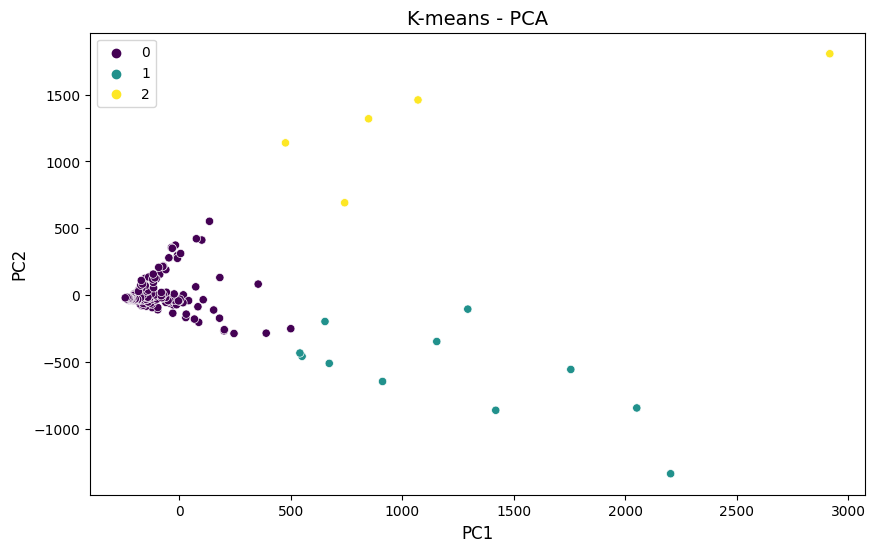

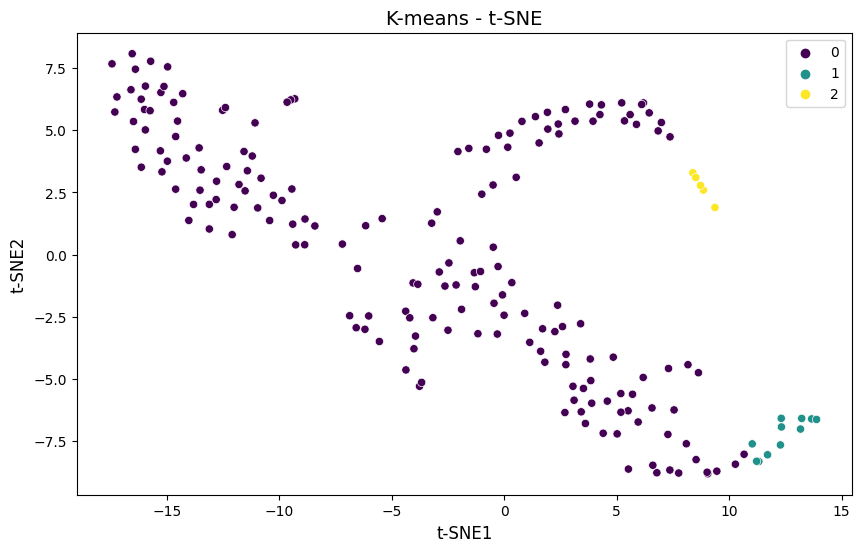

In [43]:
# Visualize clusters for K-means
kmeans_labels = kmeans_best_model.labels_
visualize_clusters(df.values, kmeans_labels, "K-means")

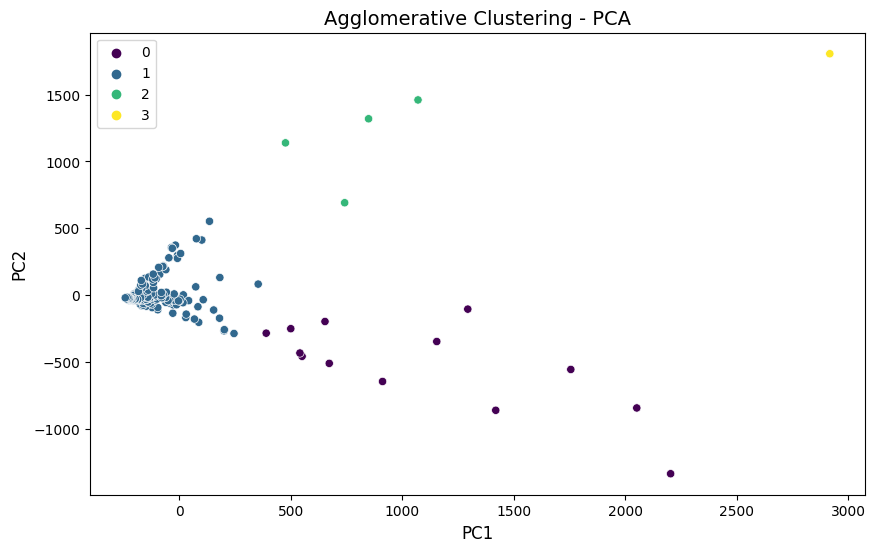

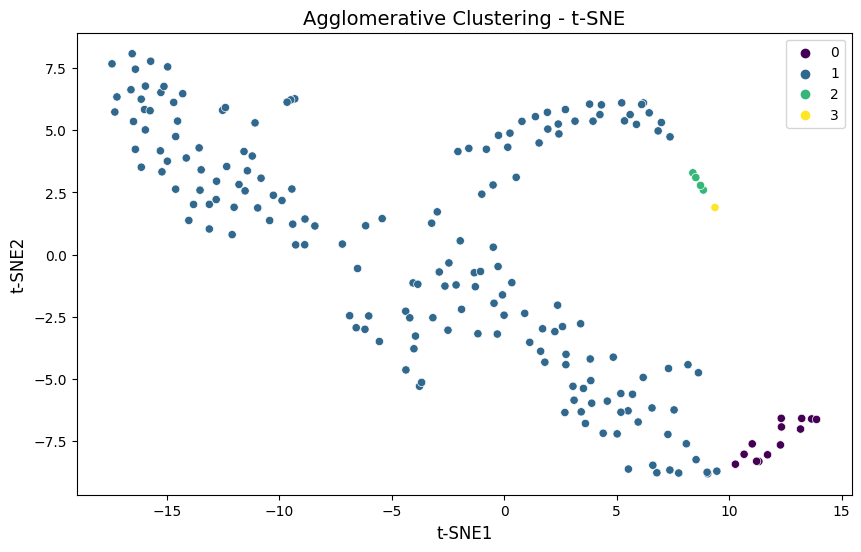

In [44]:
# Visualize clusters for Agglomerative Clustering
agglomerative_labels = agglomerative_best_model.labels_
visualize_clusters(df.values, agglomerative_labels, "Agglomerative Clustering")


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


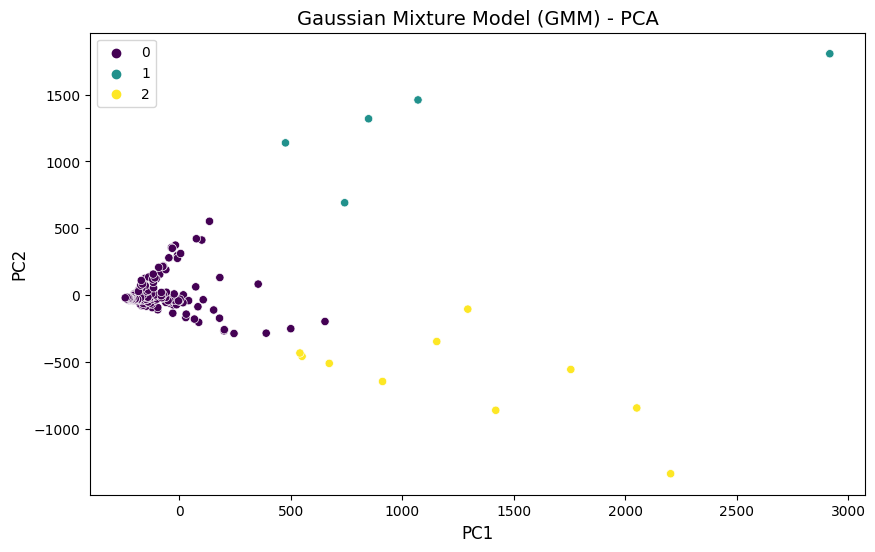

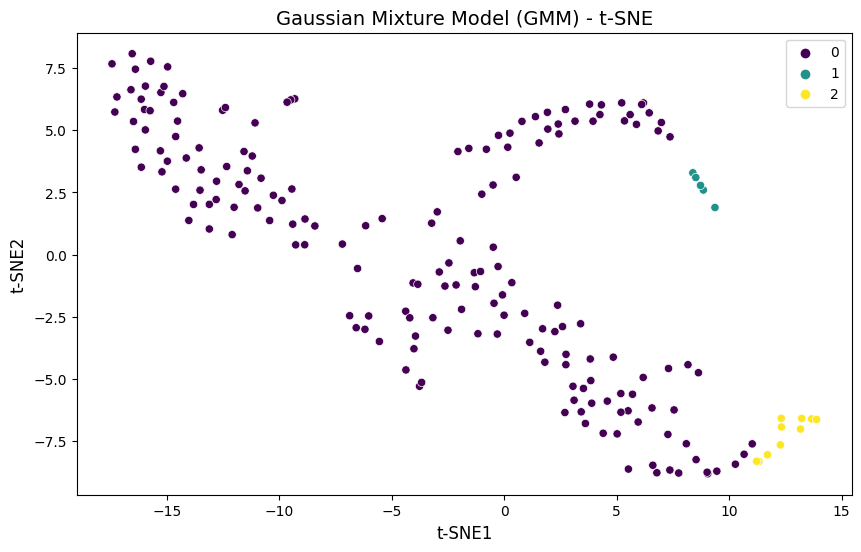

In [46]:
# Visualize clusters for Gaussian Mixture Model (GMM)
gmm_labels = gmm_best_model.predict(df.values)
visualize_clusters(df.values, gmm_labels, "Gaussian Mixture Model (GMM)")


#### 7. Recommendations

Based on the plots generated from the model interpretation code, we can make following recommendations for customer clustering and market segmentation. 

- We can identify distinct clusters of customers with similar characteristics. We can use this information to tailor marketing strategies, promotions, and product offerings to each cluster based on their preferences, behaviors, and needs.
